<a href="https://colab.research.google.com/github/nabin012/ybi-foundation-project/blob/main/Business_Sales_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [97]:
df=pd.read_csv('/content/BusinessSales.csv')

In [98]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,peripherals,associate's degree,1,2,66790,193711
1,office supplies,high school,0,4,63143,200167
2,printers,associate's degree,0,6,86480,274258
3,computer software,associate's degree,2,5,103573,358491
4,computer hardware,some college,1,2,72166,216003


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [100]:
df.columns

Index(['division', 'level of education', 'training level', 'work experience',
       'salary', 'sales'],
      dtype='object')

In [101]:
df.shape


(1000, 6)

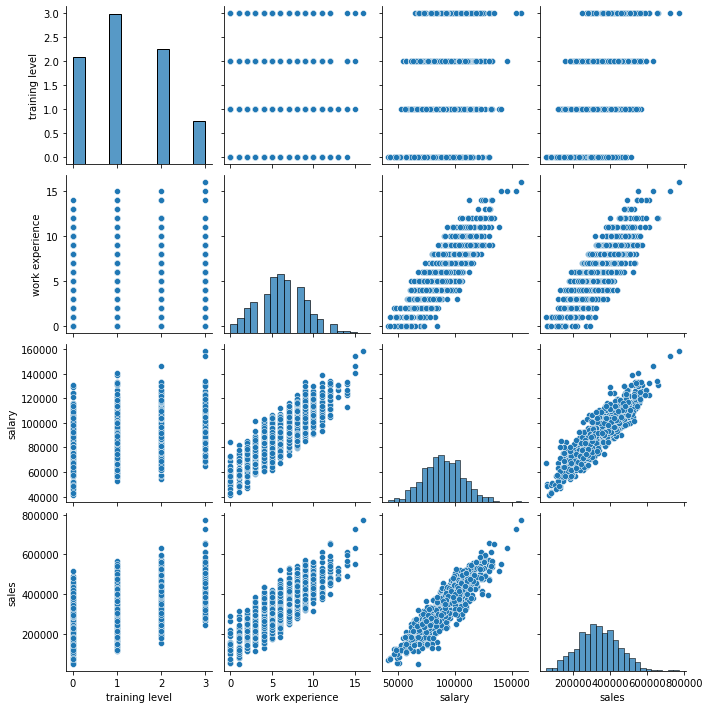

In [102]:
#data visualization part
import seaborn as sns
sns.pairplot(df)

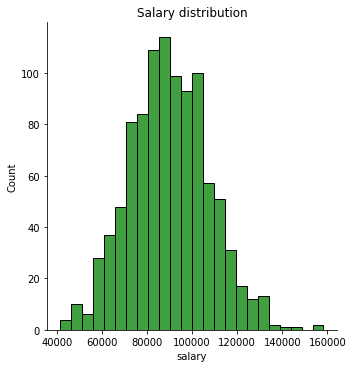

In [103]:
#1.Salary as motivator for sales
sns.displot(df["salary"],color='g')
plt.title("Salary distribution")
plt.show()

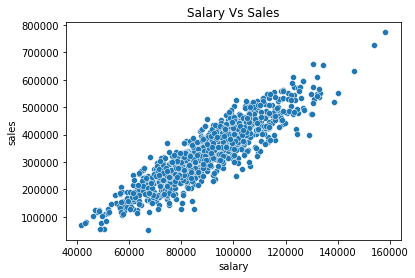

In [105]:
sns.scatterplot(x="salary", y="sales", data=df)
plt.title("Salary Vs Sales")
plt.show()

Thus from the above scatterplot you can see that higher the salary higher the sales is so salary is effective for the business sales

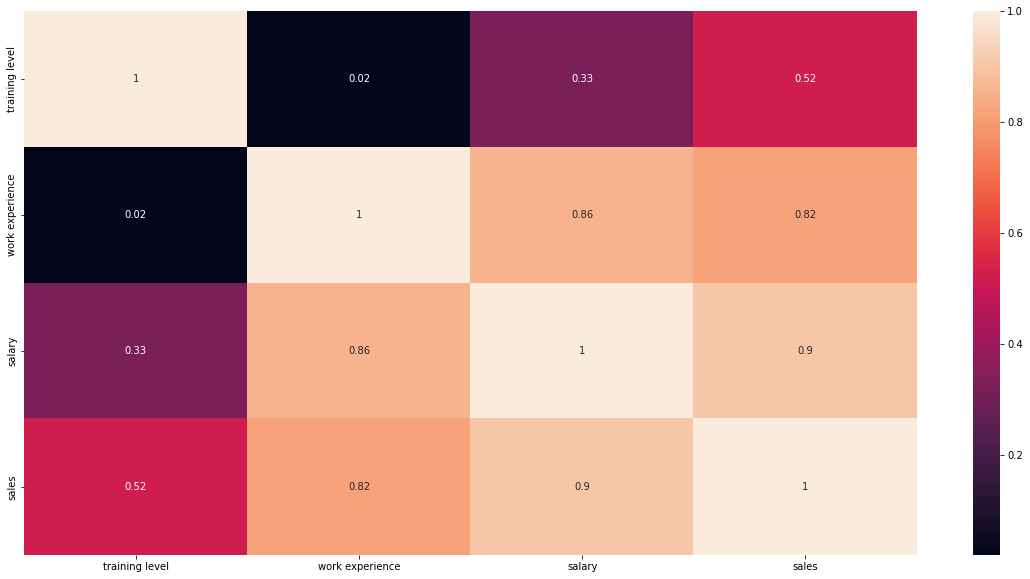

In [106]:
#feature extraction(major factor contribute to sales)
plt.figure(figsize=(20,10))
cor = df.corr()
heat = sns.heatmap(df.corr(), annot=True)

In [107]:
#Correlation with output variable
cor_target = abs(cor["sales"])

In [108]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

training level     0.523738
work experience    0.819134
salary             0.904241
sales              1.000000
Name: sales, dtype: float64

You can see that trainning level,work experinxe and salary are the major factor for the sales as their corelation value is positively corelated

Now seeing how we can increase the sales performance.As from the above factor we got 3 factor which highly affect sales then now we will analyze the relation between them and sales

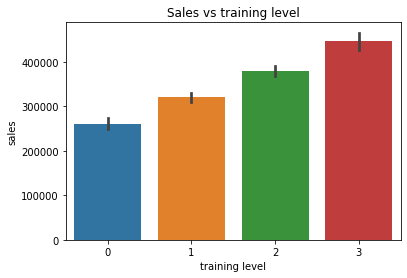

In [112]:
sns.barplot(x="training level",y="sales",data=df)
plt.title("Sales vs training level")
plt.show()

In [110]:
df['training level'].value_counts()

1    362
2    276
0    257
3    105
Name: training level, dtype: int64

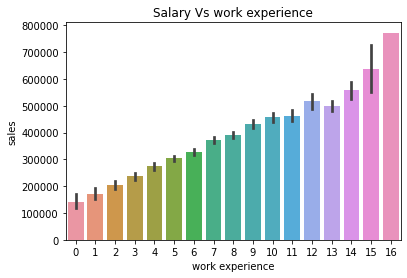

In [113]:
sns.barplot(x="work experience",y="sales",data=df)
plt.title("Salary Vs work experience")
plt.show()

In [79]:
df['work experience'].value_counts()

6     142
5     135
7     128
8     111
4      94
9      79
3      76
2      60
10     45
1      36
11     35
0      23
12     21
14      6
13      5
15      3
16      1
Name: work experience, dtype: int64

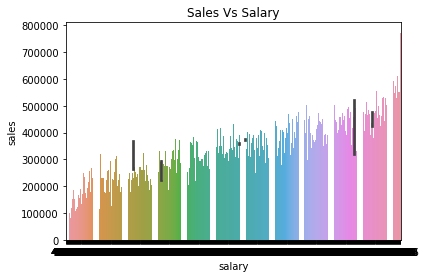

In [114]:
sns.barplot(x="salary",y="sales",data=df)
plt.title("Sales Vs Salary")
plt.show()

From the above plot between sales and the different factor we can see that Higher the factor rate higher the sales. Here you can see above in the bar plot "training level" vs "sales", Higher the trainining level higher the sales is and in the rest of the other factor also you can see higher the rate higher the sales . so to obtain the good sales A person should have best training_level, High level work experience and with the good salary.

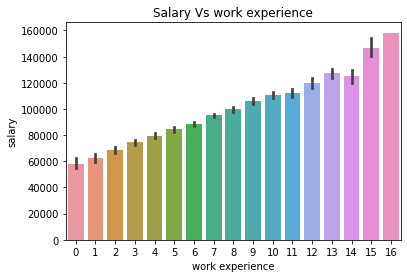

In [115]:
sns.barplot(x="work experience",y="salary",data=df)
plt.title("Salary Vs work experience")
plt.show()

you can see more the work experience more the salary is.

In [116]:
#label encoder
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'division'.
df['division']= label_encoder.fit_transform(df['division'])
  
df['division'].unique()

array([3, 2, 4, 1, 0])

In [117]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,3,associate's degree,1,2,66790,193711
1,2,high school,0,4,63143,200167
2,4,associate's degree,0,6,86480,274258
3,1,associate's degree,2,5,103573,358491
4,0,some college,1,2,72166,216003


In [118]:
# Encode labels in column 'level of education'.
df['level of education']= label_encoder.fit_transform(df['level of education'])
  
df['level of education'].unique()

array([0, 2, 4, 1, 3])

In [119]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,3,0,1,2,66790,193711
1,2,2,0,4,63143,200167
2,4,0,0,6,86480,274258
3,1,0,2,5,103573,358491
4,0,4,1,2,72166,216003


In [136]:
#here 'X' is features wheras 'Y' is class
X = df[['division', 'level of education', 'training level', 'work experience','salary']] 
y = df[['sales']]

In [121]:
X.shape

(1000, 5)

In [122]:
y.shape

(1000, 1)

In [123]:
y.head()

,sales
0,193711
1,200167
2,274258
3,358491
4,216003


In [137]:
#spliting the  data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [138]:
#shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 5)
(300, 5)
(700, 1)
(300, 1)


In [139]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [141]:
#Predicting the test set result  
n_pred= classifier.predict(X_test)
n_pred  


array([283876, 321399, 286306, 301513, 339624, 229573, 286306, 166621,
       294141, 312918, 294471, 286274, 124430, 308691, 224077, 314213,
       436711, 308691, 294471, 365280, 158712, 295988, 355182, 129751,
       339624, 436711, 300178, 197934, 267271, 146023, 381719, 205616,
       128026, 333358, 271932, 365280, 299643, 244072, 274683, 475475,
       390833, 185963, 301513, 212514,  79783,  54214, 358853, 222385,
       129751, 279257, 286306, 114288, 222385, 371867, 331578, 291527,
       304338, 271166, 274314, 204016, 129600,  52114, 223996, 304191,
       299643, 343482, 232225, 150011, 205616, 156463, 381902, 312232,
       312918, 294471, 278641, 396431, 294141, 365280, 244468, 365280,
       127931, 114288, 274683, 314213, 109202, 380486, 381660, 314213,
       514325, 275919, 397958, 184227, 260237, 371867, 386894, 294471,
       314660,  52114, 320669, 321399, 398758, 197934, 275919, 351650,
       365280, 326225, 129600, 308016, 240791, 173755, 222635, 190180,
      

In [144]:
sample=df.sample()
sample

,division,level of education,training level,work experience,salary,sales
686,3,0,3,9,123763,526951


Here You can see the sample data we have taken

In [145]:
X_new=sample.loc[:,X.columns]

In [146]:
X_new

,division,level of education,training level,work experience,salary
686,3,0,3,9,123763


In [147]:
classifier.predict(X_new)

array([400911])

In [148]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [149]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [150]:
model.predict(X_test)

array([300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
       300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000,
      

In [151]:
sample=df.sample()
sample

,division,level of education,training level,work experience,salary,sales
476,4,0,2,6,92468,380516


In [152]:
X_new=sample.loc[:,X.columns]

In [153]:
model.predict(X_new)

array([300000])

Here You can see the sample for both the model Linear Regression and The Knn model